In [1]:
import nltk
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# Question A - Script 1

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_automobile_manufacturers"
headers={"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246"}
page=requests.get(url, headers=headers)

In [3]:
soup=BeautifulSoup(page.text, "html.parser")

In [4]:
cars=soup.find_all("a", href=True)

In [5]:
carbrands=[]
for car in cars:
    striptext=car.text.strip()
    if striptext!="edit":
        carbrands.append(striptext)

In [6]:
carbrands2=[car for car in carbrands if "List " not in car]
carbrands3=[car for car in carbrands2 if " industry " not in car]
carbrands4=[car for car in carbrands3 if "[" not in car]

In [7]:
firstindex=carbrands4.index("SNVI")
finalindex=carbrands4.index("Vinaxuki")+1

In [8]:
carbrandsfinal=carbrands4[firstindex:finalindex]

In [10]:
brandsdf=pd.DataFrame(carbrandsfinal, columns=["Car Brands"])
brandsdf.to_csv("C:/Users/rprat/OneDrive/Desktop/MMA Documents/Text Analytics/Car Brands.csv", sep=",", index=False)

# Question A - Script 2

In [11]:
url="https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxuryperformance- sedans"
headers={"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246"}
page=requests.get(url, headers=headers)

In [12]:
soup=BeautifulSoup(page.text, "html.parser")

### Posts

In [61]:
posts=soup.find_all("div", class_="Message userContent")

In [62]:
postcollection=[]
for post in posts:
    postcollection.append(post.text)

In [63]:
p=2
while p!=100:
    url2=f"https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxuryperformance- sedans/p{p}"
    page=requests.get(url2)
    soup2=BeautifulSoup(page.text, "html.parser")
    posts2=soup2.find_all("div", class_="Message userContent")
    for post in posts2:
        postcollection.append(post.text)
    p+=1        

In [64]:
pc_clean=[post.strip() for post in postcollection]

In [65]:
len(pc_clean)

4951

### Users

In [18]:
users=soup.find_all("span", class_="Author")

In [19]:
usercollection=[]
for user in users:
    usercollection.append(user.text)

In [20]:
p=2
while p!=100:
    url2=f"https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxuryperformance- sedans/p{p}"
    page=requests.get(url2)
    soup2=BeautifulSoup(page.text, "html.parser")
    users2=soup2.find_all("span", class_="Author")
    for user in users2:
        usercollection.append(user.text)
    p+=1        

In [21]:
uc_clean=[user.strip() for user in usercollection]

In [22]:
len(uc_clean)

4951

### Date

In [23]:
dates=soup.find_all("span", class_="MItem DateCreated")

In [24]:
datecollection=[]
for date in dates:
    datecollection.append(date.text)

In [25]:
p=2
while p!=100:
    url2=f"https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxuryperformance- sedans/p{p}"
    page=requests.get(url2)
    soup2=BeautifulSoup(page.text, "html.parser")
    dates2=soup2.find_all("span", class_="MItem DateCreated")
    for date in dates2:
        datecollection.append(date.text)
    p+=1        

In [26]:
date_clean=[date.strip() for date in datecollection]

In [27]:
len(date_clean)

4951

In [28]:
forumactivitydf=pd.DataFrame({"Date":date_clean, "User":uc_clean, "Post": pc_clean})

In [29]:
forumactivitydf.to_csv("C:/Users/rprat/OneDrive/Desktop/MMA Documents/Text Analytics/Forum Activity History.csv", sep=",", index=False)

# Question B

In [560]:
count={}
for word in carbrandsfinal:
    count[word]=0

In [561]:
for post in pc_clean:
    words=post.split()
    countedwords=[]
    for brand in words:
        if brand in carbrandsfinal and brand not in countedwords:
            count[brand]+=1
            countedwords.append(brand)

In [562]:
topbrandsdict=dict(sorted(count.items(), key=lambda item:item[1], reverse=True))

In [566]:
sortedcounts=list(topbrandsdict.values())
sortedcars=list(topbrandsdict.keys())

top5count=sortedcounts[0:5]
top5cars=sortedcars[0:5]

top5df=pd.DataFrame(list(zip(top5cars, top5count)), columns=["Car Brand", "Unique Mention Frequency"], index=[1,2,3,4,5])

In [567]:
top5df

,Car Brand,Unique Mention Frequency
1,BMW,890
2,Acura,286
3,Infiniti,247
4,Lexus,225
5,Audi,164


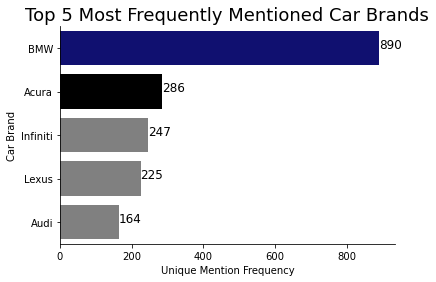

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=top5df, x="Unique Mention Frequency", y="Car Brand", orient="h", palette=["navy", "black", "grey", "grey", "grey"])
plt.xlabel("Unique Mention Frequency")
plt.ylabel("Car Brand")
plt.title("Top 5 Most Frequently Mentioned Car Brands", size=18)
sns.despine()

plt.text(x=top5count[0], y=0, s=top5count[0], 
                 color='black', fontsize=12)
plt.text(x=top5count[1], y=1, s=top5count[1], 
                 color='black', fontsize=12)
plt.text(x=top5count[2], y=2, s=top5count[2], 
                 color='black', fontsize=12)
plt.text(x=top5count[3], y=3, s=top5count[3], 
                 color='black', fontsize=12)
plt.text(x=top5count[4], y=4, s=top5count[4], 
                 color='black', fontsize=12)

plt.show()

# Question C

In [44]:
counts = {}

for i in range(len(carbrandsfinal)):
    for j in range(i+1, len(carbrandsfinal)):
        counts[(carbrandsfinal[i], carbrandsfinal[j])] = 0

In [45]:
for post in pc_clean:
    words = post.split()
    counted_pairs = set()
    for i in range(len(words)):
        for j in range(i+1, len(words)):
            if words[i] in carbrandsfinal and words[j] in carbrandsfinal:
                word_pair = (words[i], words[j])
                if word_pair not in counted_pairs:
                    if word_pair not in counts:
                        word_pair_rev=word_pair[::-1]
                        counts[word_pair_rev]=+1
                        counted_pairs.add(word_pair_rev)
                    else:
                        counts[word_pair] += 1
                        counted_pairs.add(word_pair)

In [46]:
toppairsdict=dict(sorted(counts.items(), key=lambda item:item[1], reverse=True))

In [47]:
for key in list(toppairsdict.keys()):
    if key[0]==key[1]:
        del toppairsdict[key]

In [568]:
sortedcounts=list(toppairsdict.values())
sortedpairs=list(toppairsdict.keys())

top5count=sortedcounts[0:5]
top5pairs=sortedpairs[0:5]

top5pairsdf=pd.DataFrame(list(zip(top5pairs, top5count)), columns=["Car Brand Pairs", "Pair Mention Frequency"], index=[1,2,3,4,5])

In [569]:
top5pairsdf

,Car Brand Pairs,Pair Mention Frequency
1,"(Infiniti, Saab)",7
2,"(Audi, Subaru)",6
3,"(Acura, Jaguar)",6
4,"(Audi, Saab)",5
5,"(BMW, Lexus)",5


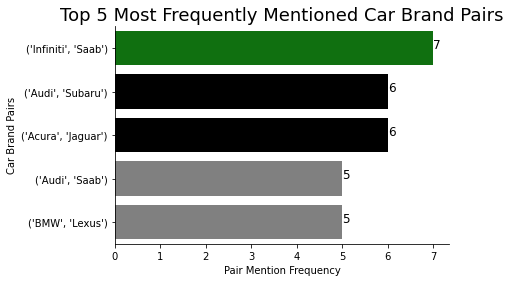

In [49]:
sns.barplot(data=top5pairsdf, x="Pair Mention Frequency", y="Car Brand Pairs", orient="h", palette=["green", "black", "black", "grey", "grey"])
plt.xlabel("Pair Mention Frequency")
plt.ylabel("Car Brand Pairs")
plt.title("Top 5 Most Frequently Mentioned Car Brand Pairs", size=18)
sns.despine()

plt.text(x=top5count[0], y=0, s=top5count[0], 
                 color='black', fontsize=12)
plt.text(x=top5count[1], y=1, s=top5count[1], 
                 color='black', fontsize=12)
plt.text(x=top5count[2], y=2, s=top5count[2], 
                 color='black', fontsize=12)
plt.text(x=top5count[3], y=3, s=top5count[3], 
                 color='black', fontsize=12)
plt.text(x=top5count[4], y=4, s=top5count[4], 
                 color='black', fontsize=12)

plt.show()

# Question D

## Corpus Cleaning

In [52]:
!pip install spacy

  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Using cached pathy-0.10.1-py3-none-any.whl (48 kB)
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)
  Using cached confection-0.0.4-py3-none-any.whl (32 kB)
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.4
    Uninstalling colorama-0.4.4:
      Successfully uninstalled colorama-0.4.4


In [91]:
from nltk.corpus import stopwords
import spacy
import string

In [92]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rprat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

### Lowercasing

In [269]:
loweredpostlist=[post.lower() for post in pc_clean]

###  Counting Attributes (Adjectives)

In [234]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rprat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [314]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\rprat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


True

In [586]:
adjcount={}

for post in loweredpostlist:
    sentences=nltk.sent_tokenize(post)
    
    words = []
    for sentence in sentences:
        words.extend(nltk.word_tokenize(sentence))
    
    tagged_words=nltk.pos_tag(words)
    
    adjs = [word[0] for word in tagged_words if word[1] == 'JJ']

    for adj in adjs:
        if adj in adjcount:
            adjcount[adj] += 1
        else:
            adjcount[adj] = 1

#remove adjectives that do not relate to physical or operational attributes
for adj in ["i", "other", "much", "many", "same", "sure", "few", "own", "only","next", 
            "true", "infiniti", "such", "right", "wrong", "last", "new", "different", "good", "great", "nice",
           "bad", "japanese", "interior", "real", "lexus","x-type", "soft", "first", "hard", "nissan","bmw","top", "audi", 
            "excellent", "second", "several"]:
    adjcount.pop(adj)

In [587]:
import operator
sorted_by_most_common = sorted(adjcount.items(), key=operator.itemgetter(1), reverse=True)

top5adj={}

for word, count in sorted_by_most_common[:5]:
    top5adj[word.capitalize()]=count

In [588]:
top5adjdf=pd.DataFrame(top5adj.items(), columns=["Adjective", "Mention Frequency"], index=[1,2,3,4,5])
top5adjdf

,Adjective,Mention Frequency
1,Manual,402
2,Little,324
3,Big,265
4,Old,261
5,High,230


In [375]:
!pip install wordcloud

<Figure size 432x288 with 0 Axes>

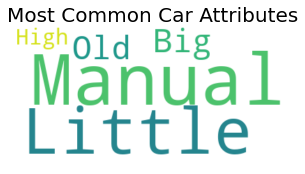

<Figure size 432x288 with 0 Axes>

In [589]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white").generate_from_frequencies(top5adj)

plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Car Attributes", size=20)
plt.figure()

### BMW Attributes

<Figure size 432x288 with 0 Axes>

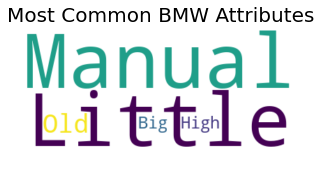

<Figure size 432x288 with 0 Axes>

In [591]:
bmwlist=[]

for post in loweredpostlist:
    if "bmw" in post:
        bmwlist.append(post)
        
bmwadjcount={}

for post in bmwlist:
    sentences=nltk.sent_tokenize(post)
    
    words = []
    for sentence in sentences:
        words.extend(nltk.word_tokenize(sentence))
    
    tagged_words=nltk.pos_tag(words)
    
    adjs = [word[0] for word in tagged_words if word[1] == 'JJ']

    for adj in adjs:
        if adj in bmwadjcount:
            bmwadjcount[adj] += 1
        else:
            bmwadjcount[adj] = 1

for adj in ["i", "other", "much", "many", "same", "sure", "few", "own", "only","next", 
            "true", "infiniti", "such", "right", "wrong", "last", "new", "different", "good", "great", "nice",
           "bad", "japanese", "interior", "real", "lexus","x-type", "soft", "first", "hard", "nissan","bmw","top", "audi", 
            "excellent", "second", "several"]:
    bmwadjcount.pop(adj)            

import operator
sorted_by_most_common = sorted(bmwadjcount.items(), key=operator.itemgetter(1), reverse=True)

top5bmwadj={}

for word, count in sorted_by_most_common[:5]:
    top5bmwadj[word.capitalize()]=count

top5bmwadj

from wordcloud import WordCloud

wc = WordCloud(background_color="white").generate_from_frequencies(top5bmwadj)

plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common BMW Attributes", size=20)
plt.figure()

In [593]:
top5bmwdf=pd.DataFrame(top5bmwadj.items(), columns=["Adjective", "Mention Frequency"], index=[1,2,3,4,5])
top5bmwdf

,Adjective,Mention Frequency
1,Manual,129
2,Little,123
3,Old,98
4,High,95
5,Big,93


### Acura Attributes

<Figure size 432x288 with 0 Axes>

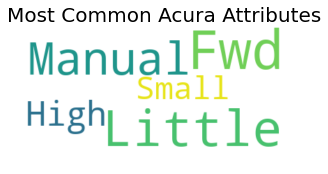

<Figure size 432x288 with 0 Axes>

In [458]:
acuralist=[]

for post in loweredpostlist:
    if "acura" in post:
        acuralist.append(post)
        
acuraadjcount={}

for post in acuralist:
    sentences=nltk.sent_tokenize(post)
    
    words = []
    for sentence in sentences:
        words.extend(nltk.word_tokenize(sentence))
    
    tagged_words=nltk.pos_tag(words)
    
    adjs = [word[0] for word in tagged_words if word[1] == 'JJ']

    for adj in adjs:
        if adj in acuraadjcount:
            acuraadjcount[adj] += 1
        else:
            acuraadjcount[adj] = 1

for adj in ["i", "other", "much", "many", "same", "sure", "few", "own", "only","next", 
            "true", "infiniti", "such", "right", "wrong", "last", "acura", "new", "different", "good", "great", "nice",
           "bad", "japanese", "interior", "first", "nissan", "real", "top", "torque", "tl", "lexus", "old", "rear", "fine",
           "hard"]:
    acuraadjcount.pop(adj)            

import operator
sorted_by_most_common = sorted(acuraadjcount.items(), key=operator.itemgetter(1), reverse=True)

top5acuraadj={}

for word, count in sorted_by_most_common[:5]:
    top5acuraadj[word.capitalize()]=count

from wordcloud import WordCloud

wc = WordCloud(background_color="white").generate_from_frequencies(top5acuraadj)

plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Acura Attributes", size=20)
plt.figure()

In [594]:
top5acuradf=pd.DataFrame(top5acuraadj.items(), columns=["Adjective", "Mention Frequency"], index=[1,2,3,4,5])
top5acuradf

,Adjective,Mention Frequency
1,Fwd,48
2,Little,41
3,Manual,36
4,High,36
5,Small,30


### Infiniti Attributes

<Figure size 432x288 with 0 Axes>

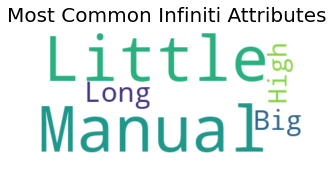

<Figure size 432x288 with 0 Axes>

In [599]:
infinitilist=[]

for post in loweredpostlist:
    if "infiniti" in post:
        infinitilist.append(post)
        
infinitiadjcount={}

for post in infinitilist:
    sentences=nltk.sent_tokenize(post)
    
    words = []
    for sentence in sentences:
        words.extend(nltk.word_tokenize(sentence))
    
    tagged_words=nltk.pos_tag(words)
    
    adjs = [word[0] for word in tagged_words if word[1] == 'JJ']

    for adj in adjs:
        if adj in infinitiadjcount:
            infinitiadjcount[adj] += 1
        else:
            infinitiadjcount[adj] = 1

for adj in ["i", "other", "much", "many", "same", "sure", "few", "own", "only","next", 
            "true", "infiniti", "such", "right", "wrong", "last", "new", "different", "good", "great", "nice",
           "bad", "japanese", "interior", "first", "nissan", "real", "top", "torque", "tl", "lexus", "g35","second",
           "bmw", "old", "hard"]:
    infinitiadjcount.pop(adj)            

import operator
sorted_by_most_common = sorted(infinitiadjcount.items(), key=operator.itemgetter(1), reverse=True)

top5infinitiadj={}

for word, count in sorted_by_most_common[:5]:
    top5infinitiadj[word.capitalize()]=count

from wordcloud import WordCloud

wc = WordCloud(background_color="white").generate_from_frequencies(top5infinitiadj)

plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Infiniti Attributes", size=20)
plt.figure()

In [601]:
top5infinitidf=pd.DataFrame(top5infinitiadj.items(), columns=["Adjective", "Mention Frequency"], index=[1,2,3,4,5])
top5infinitidf

,Adjective,Mention Frequency
1,Manual,38
2,Little,37
3,Long,28
4,Big,26
5,High,23


### Lexus Attributes

<Figure size 432x288 with 0 Axes>

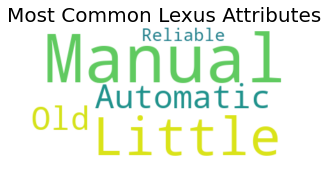

<Figure size 432x288 with 0 Axes>

In [605]:
lexuslist=[]

for post in loweredpostlist:
    if "lexus" in post:
        lexuslist.append(post)
        
lexusadjcount={}

for post in lexuslist:
    sentences=nltk.sent_tokenize(post)
    
    words = []
    for sentence in sentences:
        words.extend(nltk.word_tokenize(sentence))
    
    tagged_words=nltk.pos_tag(words)
    
    adjs = [word[0] for word in tagged_words if word[1] == 'JJ']

    for adj in adjs:
        if adj in lexusadjcount:
            lexusadjcount[adj] += 1
        else:
            lexusadjcount[adj] = 1

for adj in ["i", "other", "much", "many", "same", "sure", "few", "own", "only","next", 
            "true", "infiniti", "such", "right", "wrong", "last", "new", "different", "good", "great", "nice",
           "bad", "japanese", "interior", "real", "lexus","x-type", "soft", "first", "hard", "nissan","bmw","top"]:
    lexusadjcount.pop(adj)            

import operator
sorted_by_most_common = sorted(lexusadjcount.items(), key=operator.itemgetter(1), reverse=True)

top5lexusadj={}

for word, count in sorted_by_most_common[:5]:
    top5lexusadj[word.capitalize()]=count

from wordcloud import WordCloud

wc = WordCloud(background_color="white").generate_from_frequencies(top5lexusadj)

plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Lexus Attributes", size=20)
plt.figure()

In [607]:
top5lexusdf=pd.DataFrame(top5lexusadj.items(), columns=["Adjective", "Mention Frequency"], index=[1,2,3,4,5])
top5lexusdf

,Adjective,Mention Frequency
1,Manual,59
2,Little,33
3,Automatic,24
4,Old,23
5,Reliable,23


### Audi Attributes 

<Figure size 432x288 with 0 Axes>

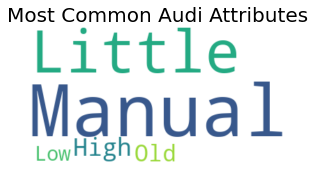

<Figure size 432x288 with 0 Axes>

In [468]:
audilist=[]

for post in loweredpostlist:
    if "audi" in post:
        audilist.append(post)
        
audiadjcount={}

for post in audilist:
    sentences=nltk.sent_tokenize(post)
    
    words = []
    for sentence in sentences:
        words.extend(nltk.word_tokenize(sentence))
    
    tagged_words=nltk.pos_tag(words)
    
    adjs = [word[0] for word in tagged_words if word[1] == 'JJ']

    for adj in adjs:
        if adj in audiadjcount:
            audiadjcount[adj] += 1
        else:
            audiadjcount[adj] = 1

for adj in ["i", "other", "much", "many", "same", "sure", "few", "own", "only","next", 
            "true", "infiniti", "such", "right", "wrong", "last", "new", "different", "good", "great", "nice",
           "bad", "japanese", "interior", "real", "lexus","x-type", "soft", "first", "hard", "nissan","bmw","top", "audi", 
            "excellent", "second", "several"]:
    audiadjcount.pop(adj)            

import operator
sorted_by_most_common = sorted(audiadjcount.items(), key=operator.itemgetter(1), reverse=True)

top5audiadj={}

for word, count in sorted_by_most_common[:5]:
    top5audiadj[word.capitalize()]=count

from wordcloud import WordCloud

wc = WordCloud(background_color="white").generate_from_frequencies(top5audiadj)

plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Audi Attributes", size=20)
plt.figure()

In [608]:
top5audidf=pd.DataFrame(top5audiadj.items(), columns=["Adjective", "Mention Frequency"], index=[1,2,3,4,5])
top5audidf

,Adjective,Mention Frequency
1,Manual,54
2,Little,42
3,High,35
4,Old,31
5,Low,24


# Question E

In [526]:
qualityadj=["good", "great", "nice", "amazing", "excellent", "perfect", "popular", "favourite", "favorite", "beautiful", 
           "love", "fantastic", "reliable", "classic", "affordable"]

In [527]:
qualitypost=[]

for post in pc_clean:
    sentences=nltk.sent_tokenize(post)
    words = []
    for sentence in sentences:
        words.extend(nltk.word_tokenize(sentence))
    for word in words:
        if word in qualityadj:
            qualitypost.append(post)

In [529]:
def qualitycounter(text, qualitywords):
    qualitywordcount=0
    sentences=nltk.sent_tokenize(text)
    words = []
    for sentence in sentences:
        words.extend(nltk.word_tokenize(sentence))
    for word in words:
        if word in qualitywords:
            qualitywordcount+=1
    return qualitywordcount   

In [546]:
count2={}
for brand in carbrandsfinal:
    brandpost=[]
    for post in qualitypost:
        words=post.split()
        if brand in words:
            brandpost.append(post)
    brandcontent=''.join(brandpost)
    qualitycount=qualitycounter(brandcontent, qualityadj)
    count2[brand]=qualitycount

In [555]:
topqualitybrandsdict=dict(sorted(count2.items(), key=lambda item:item[1], reverse=True))

sortedcounts=list(topqualitybrandsdict.values())
sortedqualitycars=list(topqualitybrandsdict.keys())

top5count=sortedcounts[0:5]
top5qualitycars=sortedqualitycars[0:5]

top5qualitycarsdf=pd.DataFrame(list(zip(top5qualitycars, top5count)), columns=["Car Brand", "Number of Quality Attribute Mentions"])

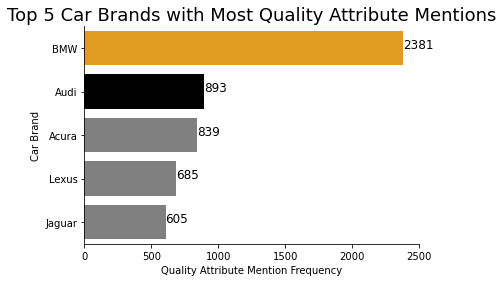

In [558]:
sns.barplot(data=top5qualitycarsdf, x="Number of Quality Attribute Mentions", y="Car Brand", orient="h", palette=["orange", "black", "grey", "grey", "grey"])
plt.xlabel("Quality Attribute Mention Frequency")
plt.ylabel("Car Brand")
plt.title("Top 5 Car Brands with Most Quality Attribute Mentions", size=18)
sns.despine()

plt.text(x=top5count[0], y=0, s=top5count[0], 
                 color='black', fontsize=12)
plt.text(x=top5count[1], y=1, s=top5count[1], 
                 color='black', fontsize=12)
plt.text(x=top5count[2], y=2, s=top5count[2], 
                 color='black', fontsize=12)
plt.text(x=top5count[3], y=3, s=top5count[3], 
                 color='black', fontsize=12)
plt.text(x=top5count[4], y=4, s=top5count[4], 
                 color='black', fontsize=12)

plt.show()